In [ ]:

import tweepy
import csv
from datetime import datetime, timedelta
from tqdm.auto import tqdm
import pandas as pd
import numpy as np

# Twitter API credentials
consumer_key = 'g8ojQRhcJC6s9bLc8ubMMxkY1'
consumer_secret = 'r0aYJ2W0bmLPP6mP4eP8uqShj22mXsHvtcSiwSwg1YIqoMnD5T'
access_token = '780453554-gGiOCQW2V2uZEaXcGpGUF57dyPPfi2m1y5ZnQb8N'
access_token_secret = 'VDnSnJmdTOwyO6186eAqkKeYmu76iaeixi2tRz0Iuzdmz'


# Authenticate with Twitter API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

The selection of the eleven public personalities for Twitter user analysis was based on a diverse representation of influential individuals across various domains, encompassing politics, technology, sports, literature, and entertainment. Each chosen personality has a substantial global following, ensuring a wide-reaching and diverse audience.
The selected individuals are:

Rahul Gandhi (@RahulGandhi): A prominent political figure in Indian politics.

Elon Musk (@elonmusk): A visionary entrepreneur, CEO of Tesla and SpaceX, known for his innovations in technology and space exploration.

Cristiano Ronaldo (@cristiano): One of the world's greatest footballers with a massive global fan base.

Bill Gates (@BillGates): Co-founder of Microsoft and a leading philanthropist, focusing on global health and education.

Amitabh Bachchan (@SrBachchan): An iconic Bollywood actor and film industry legend.

Virat Kohli (@imVkohli): Captain of the Indian national cricket team, considered one of the best batsmen in the world.

Barack Obama (@BarackObama): Former President of the United States, known for his global impact on politics and diplomacy.

Emma Watson (@EmmaWatson): Renowned actress and UN Women Goodwill Ambassador, advocating for gender equality.

J.K. Rowling (@jk_rowling): Best-selling author of the Harry Potter series, known for her literary contributions.

Serena Williams (@serenawilliams): Tennis legend, winner of numerous Grand Slam titles and an influential figure in sports.

Narendra Modi (@narendramodi): Prime Minister of India, a key political figure on the global stage.

In [ ]:
users = [
    "RahulGandhi",
    "elonmusk",
    "cristiano",
    "BillGates",
    "SrBachchan",
    "imVkohli",
    "BarackObama",
    "EmmaWatson",
    "jk_rowling",
    "serenawilliams",
    "narendramodi"
]

In [ ]:
followers = []
for user in tqdm(users):
  user_followers = api.get_followers(screen_name = user, count = 100)
  user_followers = [i._json for i in user_followers]
  df = pd.DataFrame(user_followers)
  df['Parent'] = user
  followers.append(df)

  0%|          | 0/11 [00:00<?, ?it/s]

In [ ]:
users_tw = [api.get_user(screen_name = i)._json for i in users]
users_tw = pd.DataFrame(users_tw)
users_tw

,id,id_str,name,screen_name,location,profile_location,description,url,entities,protected,...,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,withheld_in_countries
0,3171712086,3171712086,Rahul Gandhi,RahulGandhi,,None,This is the official account of Rahul Gandhi |...,https://t.co/lY0TRLHAcX,{'url': {'urls': [{'url': 'https://t.co/lY0TRL...,False,...,333333,True,True,True,False,True,False,True,none,[]
1,44196397,44196397,Elon Musk,elonmusk,,None,,None,{'description': {'urls': []}},False,...,333333,True,True,False,False,True,False,True,none,[]
2,155659213,155659213,Cristiano Ronaldo,Cristiano,,None,This Privacy Policy addresses the collection a...,https://t.co/JlMkKHxKo1,{'url': {'urls': [{'url': 'https://t.co/JlMkKH...,False,...,0D0D0D,True,False,False,False,False,False,False,regular,[]
3,50393960,50393960,Bill Gates,BillGates,"Seattle, WA",None,Sharing things I'm learning through my foundat...,https://t.co/UkvHzxDwkH,{'url': {'urls': [{'url': 'https://t.co/UkvHzx...,False,...,333333,False,False,False,False,True,False,False,regular,[]
4,145125358,145125358,Amitabh Bachchan,SrBachchan,"Mumbai, India",None,"""तुमने हमें पूज पूज कर पत्थर कर डाला ; वे जो ह...",https://t.co/AdA1Uiv5ph,{'url': {'urls': [{'url': 'https://t.co/AdA1Ui...,False,...,000000,True,False,False,False,True,False,False,none,[]
5,71201743,71201743,Virat Kohli,imVkohli,,None,A proud husband and father ❤️,https://t.co/ec8skIzXFO,{'url': {'urls': [{'url': 'https://t.co/ec8skI...,False,...,333333,True,True,False,False,True,False,False,regular,[]
6,813286,813286,Barack Obama,BarackObama,"Washington, DC",None,"Dad, husband, President, citizen.",https://t.co/9EAGxkEB9p,{'url': {'urls': [{'url': 'https://t.co/9EAGxk...,False,...,333333,True,True,False,False,False,False,False,regular,[]
7,166739404,166739404,Emma Watson,EmmaWatson,,None,,https://t.co/bvMO5Qlo4Y,{'url': {'urls': [{'url': 'https://t.co/bvMO5Q...,False,...,666666,True,False,False,False,False,False,False,none,[]
8,62513246,62513246,J.K. Rowling,jk_rowling,Scotland,None,Writer sometimes known as Robert Galbraith,https://t.co/sQiPGyMaQ2,{'url': {'urls': [{'url': 'https://t.co/sQiPGy...,False,...,000000,True,True,False,False,True,False,False,regular,[]
9,26589987,26589987,Serena Williams,serenawilliams,Somewhere over the Rainbow,None,"Living, Loving, and working to help you.",https://t.co/dQQQA3ino7,{'url': {'urls': [{'url': 'https://t.co/dQQQA3...,False,...,3D1957,True,False,False,False,False,False,False,none,[]


In [ ]:
users_tw.shape

(11, 45)

In [ ]:
users_tw.columns

Index(['id', 'id_str', 'name', 'screen_name', 'location', 'profile_location',
       'description', 'url', 'entities', 'protected', 'followers_count',
       'friends_count', 'listed_count', 'created_at', 'favourites_count',
       'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count',
       'lang', 'status', 'contributors_enabled', 'is_translator',
       'is_translation_enabled', 'profile_background_color',
       'profile_background_image_url', 'profile_background_image_url_https',
       'profile_background_tile', 'profile_image_url',
       'profile_image_url_https', 'profile_banner_url', 'profile_link_color',
       'profile_sidebar_border_color', 'profile_sidebar_fill_color',
       'profile_text_color', 'profile_use_background_image',
       'has_extended_profile', 'default_profile', 'default_profile_image',
       'following', 'follow_request_sent', 'notifications', 'translator_type',
       'withheld_in_countries'],
      dtype='object')

Basic Statistics of User Data:
       followers_count  friends_count   listed_count  favourites_count  \
count     1.100000e+01      11.000000      11.000000         11.000000   
mean      6.907996e+07   50287.272727   66725.545455       8050.636364   
std       5.243756e+07  164175.126703   67282.136385      17132.990050   
min       1.046921e+07      61.000000    5548.000000          0.000000   
25%       2.614857e+07     320.000000   25458.000000         51.500000   
50%       6.078619e+07     534.000000   31652.000000        493.000000   
75%       1.028599e+08    1476.000000  102915.000000        898.500000   
max       1.714954e+08  545288.000000  214314.000000      43651.000000   

       statuses_count  
count       11.000000  
mean     19723.272727  
std      21474.311966  
min       1844.000000  
25%       4224.000000  
50%      14730.000000  
75%      27234.000000  
max      70757.000000  


<ipython-input-10-91a124e76b9d>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 0].set_xticklabels(user_data['screen_name'], rotation=45, ha='right')
<ipython-input-10-91a124e76b9d>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 1].set_xticklabels(user_data['screen_name'], rotation=45, ha='right')
<ipython-input-10-91a124e76b9d>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 0].set_xticklabels(user_data['screen_name'], rotation=45, ha='right')
<ipython-input-10-91a124e76b9d>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 1].set_xticklabels(user_data['screen_name'], rotation=45, ha='right')
<ipython-input-10-91a124e76b9d>:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2, 0].set_xticklabels(user_data['screen_name'], rotation=45, ha='right')


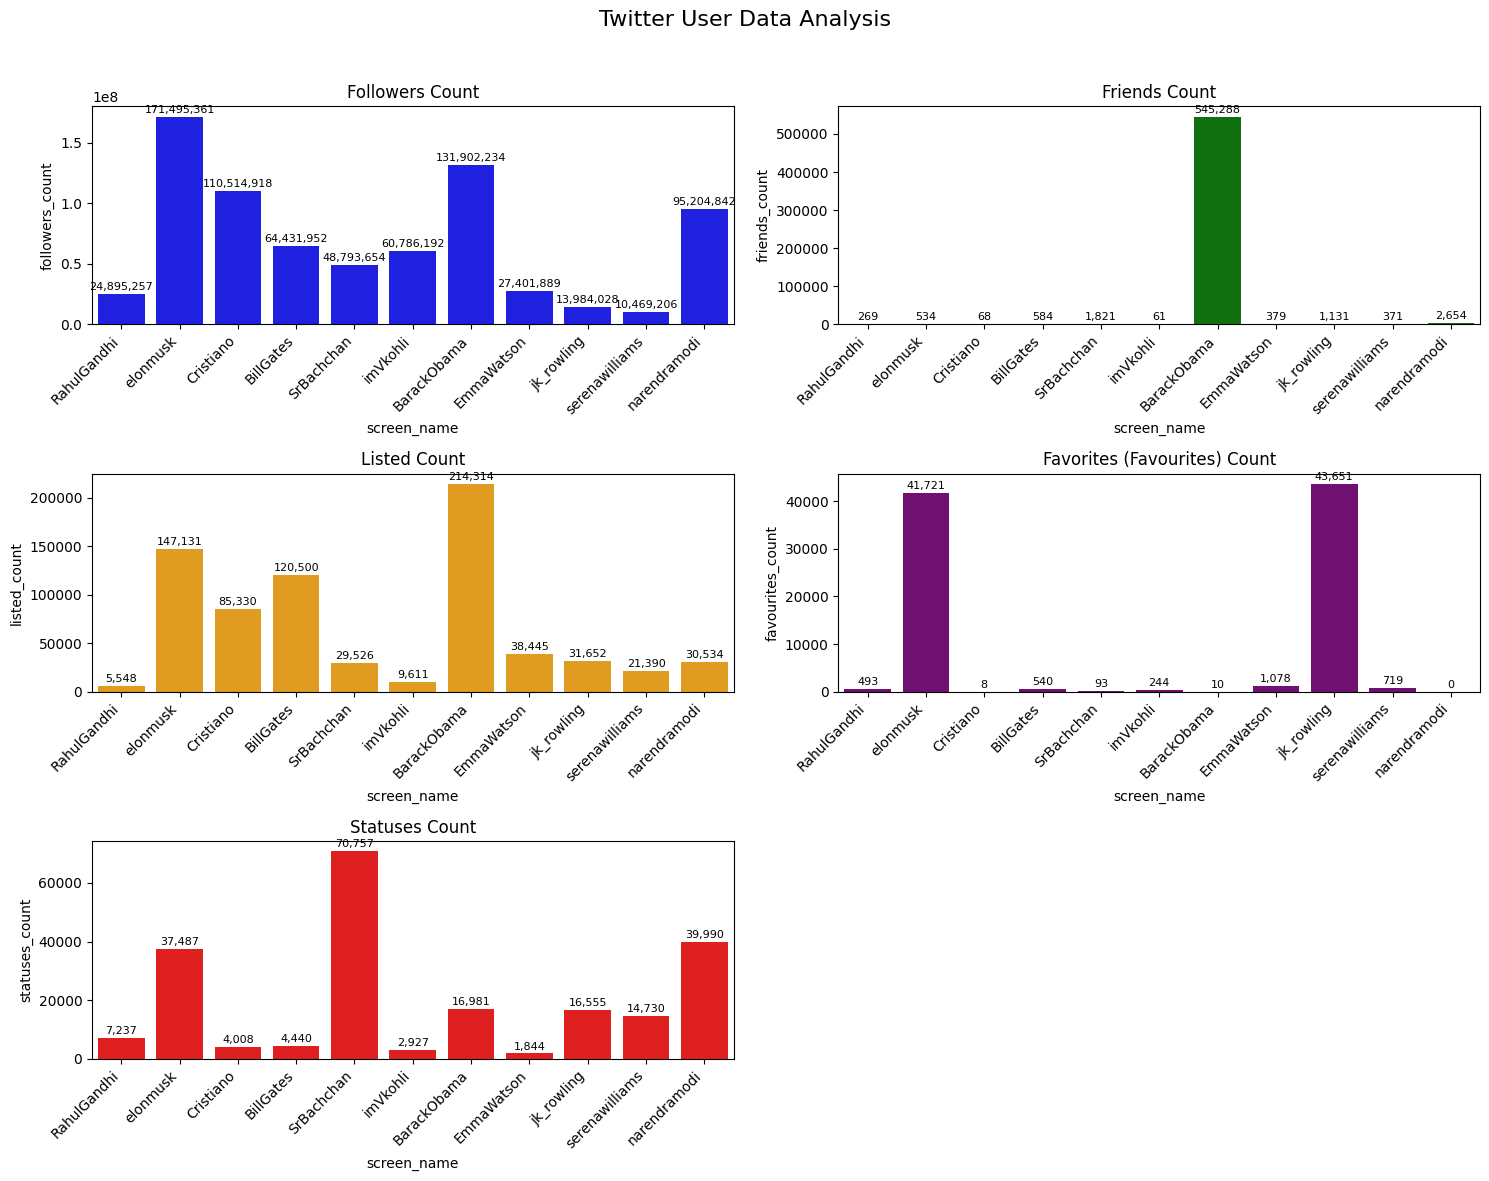

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming users_tw is your DataFrame
# Replace 'your_column_names' with the actual column names you have in your DataFrame
user_data = users_tw[['screen_name', 'followers_count', 'friends_count', 'listed_count', 'favourites_count', 'statuses_count']]

# Display basic statistics of the user data
print("Basic Statistics of User Data:")
print(user_data.describe())

# Plotting various user data with labels and numbers
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
fig.suptitle('Twitter User Data Analysis', fontsize=16)

# Helper function to annotate bars with values
def annotate_bars(ax, data):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Bar plots with labels and numbers
sns.barplot(ax=axes[0, 0], x='screen_name', y='followers_count', data=user_data, color='blue')
axes[0, 0].set_title('Followers Count')
axes[0, 0].set_xticklabels(user_data['screen_name'], rotation=45, ha='right')
annotate_bars(axes[0, 0], user_data['followers_count'])

sns.barplot(ax=axes[0, 1], x='screen_name', y='friends_count', data=user_data, color='green')
axes[0, 1].set_title('Friends Count')
axes[0, 1].set_xticklabels(user_data['screen_name'], rotation=45, ha='right')
annotate_bars(axes[0, 1], user_data['friends_count'])

sns.barplot(ax=axes[1, 0], x='screen_name', y='listed_count', data=user_data, color='orange')
axes[1, 0].set_title('Listed Count')
axes[1, 0].set_xticklabels(user_data['screen_name'], rotation=45, ha='right')
annotate_bars(axes[1, 0], user_data['listed_count'])

sns.barplot(ax=axes[1, 1], x='screen_name', y='favourites_count', data=user_data, color='purple')
axes[1, 1].set_title('Favorites (Favourites) Count')
axes[1, 1].set_xticklabels(user_data['screen_name'], rotation=45, ha='right')
annotate_bars(axes[1, 1], user_data['favourites_count'])

sns.barplot(ax=axes[2, 0], x='screen_name', y='statuses_count', data=user_data, color='red')
axes[2, 0].set_title('Statuses Count')
axes[2, 0].set_xticklabels(user_data['screen_name'], rotation=45, ha='right')
annotate_bars(axes[2, 0], user_data['statuses_count'])

# Remove empty subplot
fig.delaxes(axes[2, 1])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


followers_count	=
The number of followers this account currently has.

friends_count	=
The number of users this account is following (AKA their “followings”).

listed_count =
The number of public lists that this user is a member of.

favourites_count =
The number of Tweets this user has liked in the account’s lifetime.

statuses_count	=
The number of Tweets (including retweets) issued by the user.

In [ ]:
user_data = pd.concat(followers)

In [ ]:
full_data = pd.concat([user_data,users_tw]).reset_index(drop = True)
full_data

,id,id_str,name,screen_name,location,description,url,entities,protected,followers_count,...,notifications,muting,blocking,blocked_by,translator_type,withheld_in_countries,status,profile_banner_url,Parent,profile_location
0,1755185795592593408,1755185795592593408,qasim,qasimsk87,,,None,{'description': {'urls': []}},False,0,...,False,False,False,False,none,[],NaN,NaN,RahulGandhi,NaN
1,762120973,762120973,ashish kumar,ashishk10807692,,,None,{'description': {'urls': []}},False,27,...,False,False,False,False,none,[],{'created_at': 'Sat Feb 03 03:44:26 +0000 2024...,NaN,RahulGandhi,NaN
2,1755186375702228992,1755186375702228992,Hagoromo Otsutsuki,otsustkiROMO,,,None,{'description': {'urls': []}},False,0,...,False,False,False,False,none,[],{'created_at': 'Wed Feb 07 11:09:09 +0000 2024...,NaN,RahulGandhi,NaN
3,1755185738293891072,1755185738293891072,Santram Jakhar,JakharSant14092,,,None,{'description': {'urls': []}},False,0,...,False,False,False,False,none,[],NaN,NaN,RahulGandhi,NaN
4,1755178553023352832,1755178553023352832,lonely journey400,lonely31846,"Chennai, Avadi",Everything is Possible...!,None,{'description': {'urls': []}},False,0,...,False,False,False,False,none,[],NaN,https://pbs.twimg.com/profile_banners/17551785...,RahulGandhi,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,813286,813286,Barack Obama,BarackObama,"Washington, DC","Dad, husband, President, citizen.",https://t.co/9EAGxkEB9p,{'url': {'urls': [{'url': 'https://t.co/9EAGxk...,False,131902234,...,False,NaN,NaN,NaN,regular,[],{'created_at': 'Tue Feb 06 20:45:02 +0000 2024...,https://pbs.twimg.com/profile_banners/813286/1...,NaN,None
1107,166739404,166739404,Emma Watson,EmmaWatson,,,https://t.co/bvMO5Qlo4Y,{'url': {'urls': [{'url': 'https://t.co/bvMO5Q...,False,27401889,...,False,NaN,NaN,NaN,none,[],{'created_at': 'Fri May 05 09:13:24 +0000 2023...,https://pbs.twimg.com/profile_banners/16673940...,NaN,None
1108,62513246,62513246,J.K. Rowling,jk_rowling,Scotland,Writer sometimes known as Robert Galbraith,https://t.co/sQiPGyMaQ2,{'url': {'urls': [{'url': 'https://t.co/sQiPGy...,False,13984028,...,False,NaN,NaN,NaN,regular,[],{'created_at': 'Fri Feb 02 16:19:16 +0000 2024...,https://pbs.twimg.com/profile_banners/62513246...,NaN,None
1109,26589987,26589987,Serena Williams,serenawilliams,Somewhere over the Rainbow,"Living, Loving, and working to help you.",https://t.co/dQQQA3ino7,{'url': {'urls': [{'url': 'https://t.co/dQQQA3...,False,10469206,...,False,NaN,NaN,NaN,none,[],{'created_at': 'Fri Feb 02 02:33:35 +0000 2024...,https://pbs.twimg.com/profile_banners/26589987...,NaN,None


In [ ]:
full_data.to_csv('user_data.csv', index = False)

In [ ]:
full_data.shape

(1111, 50)

In [ ]:
full_data.columns

Index(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url',
       'entities', 'protected', 'followers_count', 'friends_count',
       'listed_count', 'created_at', 'favourites_count', 'utc_offset',
       'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang',
       'contributors_enabled', 'is_translator', 'is_translation_enabled',
       'profile_background_color', 'profile_background_image_url',
       'profile_background_image_url_https', 'profile_background_tile',
       'profile_image_url', 'profile_image_url_https', 'profile_link_color',
       'profile_sidebar_border_color', 'profile_sidebar_fill_color',
       'profile_text_color', 'profile_use_background_image',
       'has_extended_profile', 'default_profile', 'default_profile_image',
       'following', 'live_following', 'follow_request_sent', 'notifications',
       'muting', 'blocking', 'blocked_by', 'translator_type',
       'withheld_in_countries', 'status', 'profile_banner_url', 'Parent',

In [ ]:
!pip install textblob networkx matplotlib seaborn

In [ ]:
!pip install tweepy networkx plotly

In [ ]:
def get_timeline(user):
  try:
    timeline = []
    start_date = datetime.now() - timedelta(days=365)
    for tweet in tweepy.Cursor(api.user_timeline, screen_name=user, since_id=start_date).items():
      timeline.append(tweet._json)
  except:
    timeline = []
  return timeline

In [ ]:
# timelines = []
# for i in tqdm(full_data['screen_name'].drop_duplicates().tolist()):
#   timelines.append(get_timeline(i))

  0%|          | 0/1026 [00:00<?, ?it/s]

In [ ]:
# import json
# json.dump(timelines, open('timelines.json','w'))

In [ ]:
# !zip "timelines.zip" timelines.json

In [ ]:
import json
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# with open(timelines_file, 'r', encoding='utf-8', errors='replace') as file:
#     timelines = json.load(file)

# # Flatten the list of timelines
# tweets_data = [tweet for timeline in timelines for tweet in timeline]

# # Load the timelines data from the JSON file
# timelines_file = '/content/drive/MyDrive/timelines.zip'  # Replace with the actual file path
# with open(timelines_file, 'r') as file:
#     timelines = json.load(file)


In [ ]:

import zipfile

# Specify the path to the ZIP file
zip_file_path = '/content/drive/MyDrive/timelines.zip'  # Replace with the actual file path

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Assuming there's only one file in the ZIP archive, extract it
    zip_ref.extractall('/content/extracted_folder')

# Now, load the JSON file from the extracted folder
json_file_path = '/content/extracted_folder/timelines.json'  # Replace with the actual file path
with open(json_file_path, 'r', encoding='utf-8', errors='replace') as file:
    timelines = json.load(file)

# Flatten the list of timelines
tweets_data = [tweet for timeline in timelines for tweet in timeline]

# Create a DataFrame from the tweets data
tweets_df = pd.DataFrame(tweets_data)

# Display basic information about the DataFrame
print("Shape of Tweets DataFrame:", tweets_df.shape)
print("\nColumns in Tweets DataFrame:", tweets_df.columns)

# Display basic statistics of the user data
print("\nBasic Statistics of Tweets DataFrame:")
print(tweets_df.describe())


Shape of Tweets DataFrame: (188837, 30)

Columns in Tweets DataFrame: Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count',
       'favorite_count', 'favorited', 'retweeted', 'lang', 'extended_entities',
       'possibly_sensitive', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status', 'withheld_in_countries'],
      dtype='object')

Basic Statistics of Tweets DataFrame:
                 id  in_reply_to_status_id  in_reply_to_user_id  \
count  1.888370e+05           6.742000e+04         6.945900e+04   
mean   1.453765e+18           1.559473e+18         6.167214e+17   
std    4.137387e+17           3.311827e+17         6.784713e+17   
min    1.799458e+08           2.618530e+08      

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')

# Word Cloud
def generate_wordcloud(text):
    # Add custom stop words to the default set
    custom_stop_words = set(stopwords.words('english') + ['https', 'rt', 'youtube', 'de', 'la', 'etc'])

    word_tokens = word_tokenize(text)

    # Filter out stop words
    filtered_words = [word.lower() for word in word_tokens if word.isalpha() and word.lower() not in custom_stop_words]

    return " ".join(filtered_words)

# Combine all tweets into a single string
all_tweets_text = " ".join(tweets_df['text'].astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(generate_wordcloud(all_tweets_text))

# Plot the Word Cloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()


In [ ]:
!pip install transformers

In [ ]:
tweets_df.to_csv('tweets_df.csv', index = False)

In [ ]:
!zip 'tweetscsv.zip' tweets_df.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Preprocessing:
Lower Casing.
Tokenization.
Punctuation Mark Removal.
Stop Word Removal.
Stemming.
Lemmatization.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


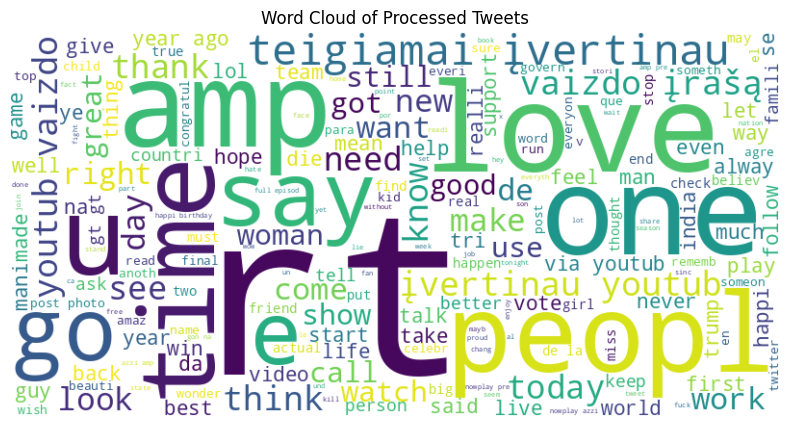

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import zipfile
import nltk

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Function for text preprocessing
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Punctuation removal
    tokens = [word for word in tokens if word.isalpha()]

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)

# Apply text preprocessing to each tweet
tweets_df['processed_text'] = tweets_df['text'].apply(preprocess_text)

# Combine all processed tweets into a single string
all_processed_tweets_text = " ".join(tweets_df['processed_text'].astype(str))

# Generate word cloud for processed text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_processed_tweets_text)

# Plot the Word Cloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Processed Tweets')
plt.show()
